# Show data collected

In [ ]:
data = pd.read_csv('./raw_scraped.csv', index_col=False, delimiter=",")

## - Class plot

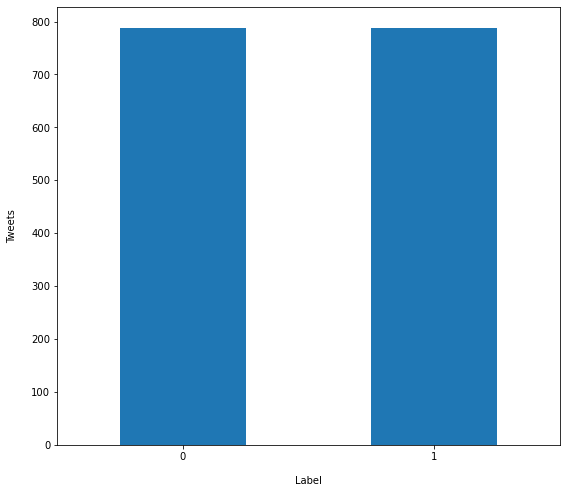

In [2]:
import pandas as pd
data = pd.read_csv('./labeled/2021-12-01-labeled-only.csv', index_col=False, delimiter=",")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data['target'].value_counts().plot(kind='bar')
plt.xlabel("Label", labelpad=14)
plt.xticks(rotation=0)
plt.ylabel("Tweets", labelpad=14);
# plt.title("Training set", y=1.02);
plt.subplots_adjust(bottom=0.50)
plt.rcParams["figure.figsize"] = [9,16]

plt.savefig('training set.png')

## - Histogram of a single file

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(file_name, index_col=False, delimiter=",")

# get only month and year from datetime column (date of exam)
df['date_col'] = df['Datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year
data = df.groupby(['date_col']).size().reset_index(name = 'count')  

ax = sns.barplot(x="date_col", y="count", data=data, zorder=2).set(title='Distribution of tweets') #plot using seaborn
plt.xticks(rotation=70)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [11,9]
plt.grid()

## - Bar charts

(85055, 5)


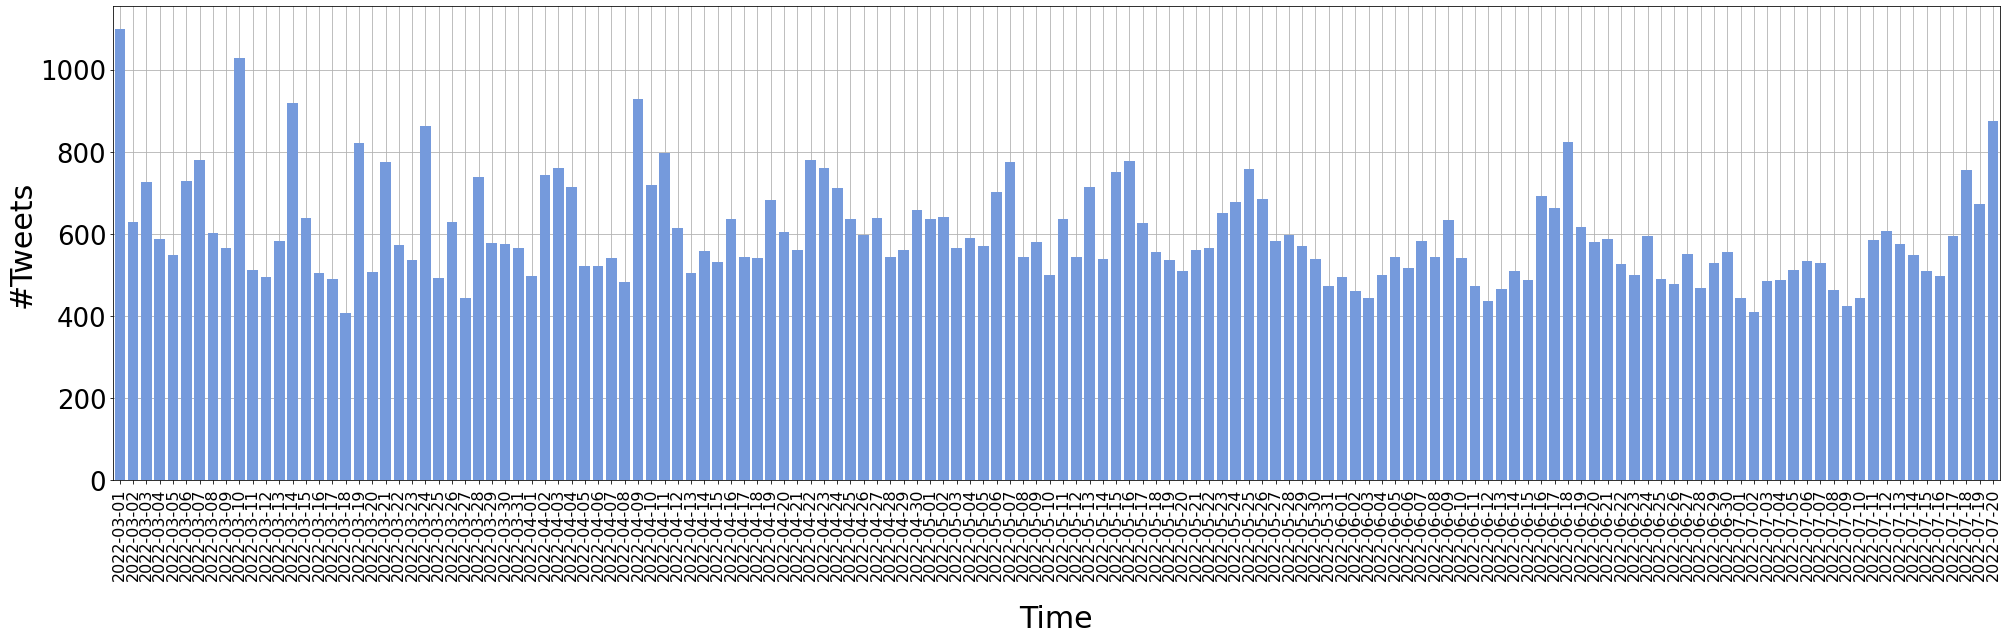

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")

# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)
#
# group by based on month and year
data = df.groupby(['date_col']).size().reset_index(name = 'count')  

ax = sns.barplot(x="date_col", y=data["count"], data=data, zorder=2, color="cornflowerblue")
# plt.title('Distribution of tweets',fontsize=36,pad=30)
plt.xlabel('Time',fontsize=30,labelpad=24)
plt.ylabel('#Tweets',fontsize=30)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=26)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid()
plt.savefig('./monitoring/monitoring_barplot_days.png')

(85055, 5)


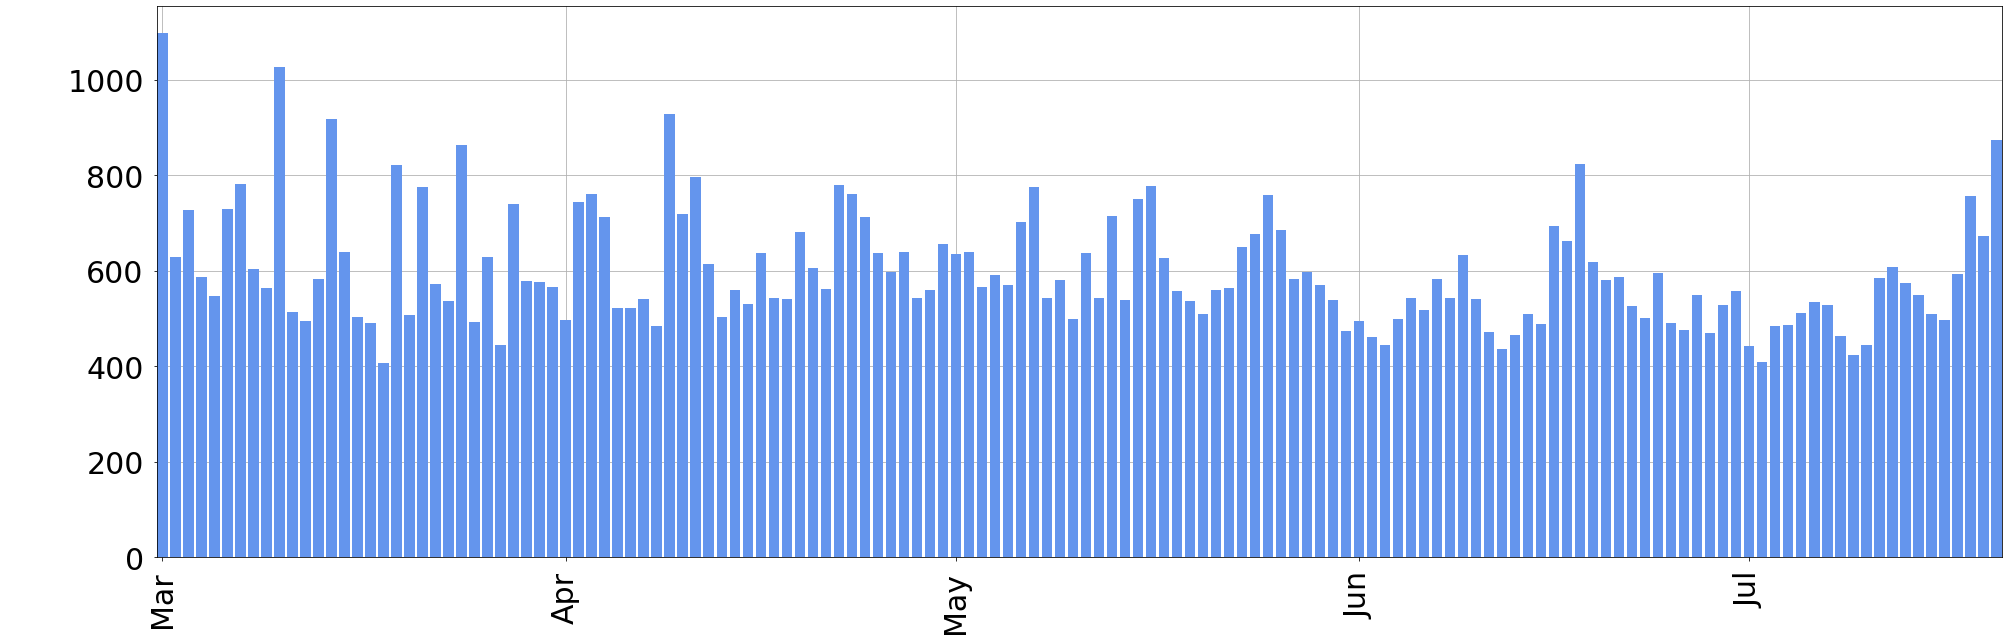

In [12]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
# Plot
plt.bar(data['date_col'], data['count'], color="cornflowerblue", zorder=2)
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
label = plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
plt.savefig('./monitoring/monitoring_barplot.png')
plt.show()

## - Peaks highlighted

     counts    datetime
90     1099  2022-03-01
99     1028  2022-03-10
103     919  2022-03-14
108     822  2022-03-19
113     863  2022-03-24
129     928  2022-04-09
199     824  2022-06-18
231     874  2022-07-20
(85055, 5)
{'2022-03-01': 1099, '2022-03-10': 1028, '2022-03-14': 919, '2022-03-19': 822, '2022-03-24': 863, '2022-04-09': 928, '2022-06-18': 824, '2022-07-20': 874}
2022-03-10
2022-04-09
2022-06-18
2022-07-20


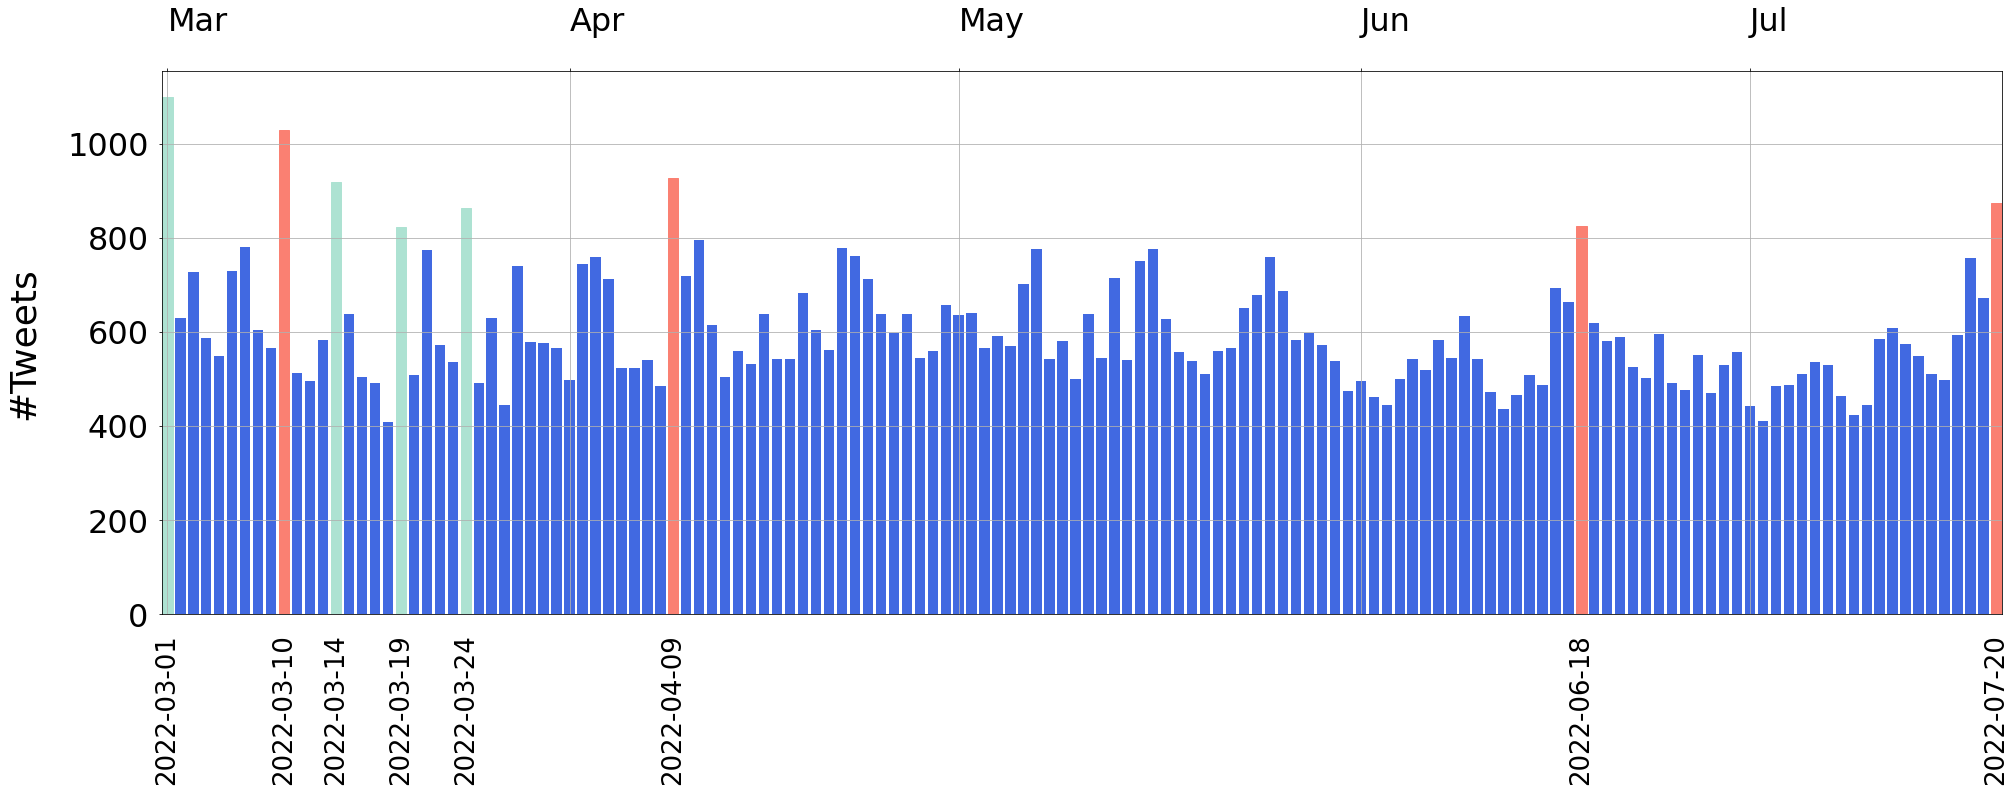

In [5]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

input_file = './merged/cleaned.csv'
dataset = pd.read_csv(input_file)
dataset = dataset.groupby(dataset['datetime'].astype('datetime64').dt.to_period('d')).size().reset_index(name='counts')
dataset["datetime"]= dataset["datetime"].dt.strftime('%Y-%m-%d')
dataset = dataset.iloc[:, ::-1]

res = dataset[(dataset['counts'] > 800) & (dataset['datetime'] >= '2022-03-01')]
print(res)

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

#find peaks
peaks = {}
for index, row in res.iterrows():
    peaks[row['datetime']] = row['counts']
print(peaks)
Discarded = ['2022-03-01','2022-03-14', '2022-03-19', '2022-03-24']
# for peak in Discarded:
#     peaks.pop(peak)
# print(peaks)

# group by based on month and year
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data.set_index("date_col")

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots()
# bars = ax.bar(x="date_col", y=data["count"], data=data, zorder=2, color="cornflowerblue")

barlist = plt.bar(data['date_col'], data['count'], color="royalblue")
X = plt.gca().xaxis
X.set_ticks_position('top')
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
label = plt.ylabel('#Tweets',fontsize=36,labelpad=26)
# label.set_color("white")
#Ticks
plt.xticks(rotation=0, fontsize=32, horizontalalignment='left')
plt.yticks(fontsize=32)

plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=30)
# plt.tick_params(axis='y', pad=10, colors='white')
# plt.tick_params(axis='x', pad=30, colors='white')

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
# plt.subplots_adjust(bottom=0.55)

for key, value in peaks.items():
    p = datetime.strptime(key, '%Y-%m-%d')
    i = data[data['date_col'] == key].index[0]
    row = data[data['date_col'] == key]
    ts = row.iloc[0]['date_col']
    s = ts.strftime('%Y-%m-%d')
    
    if(s not in Discarded):
        print(s)
        barlist[i].set_color('salmon')
        plt.text(ts,-350, s, fontsize=26, rotation=90, horizontalalignment='center')
#         plt.text(ts,-350, s, fontsize=26, rotation=90, horizontalalignment='center', color='white')
    else:
        barlist[i].set_color('#ade2d2')
        plt.text(ts,-350, s, fontsize=26, rotation=90, horizontalalignment='center')
#         plt.text(ts,-350, s, fontsize=26, rotation=90, horizontalalignment='center', color='white')
    
    
plt.savefig('./docs/img/monitoring_barplot_peaks.png', bbox_inches='tight')
plt.show()


## - Line chart

(85055, 5)


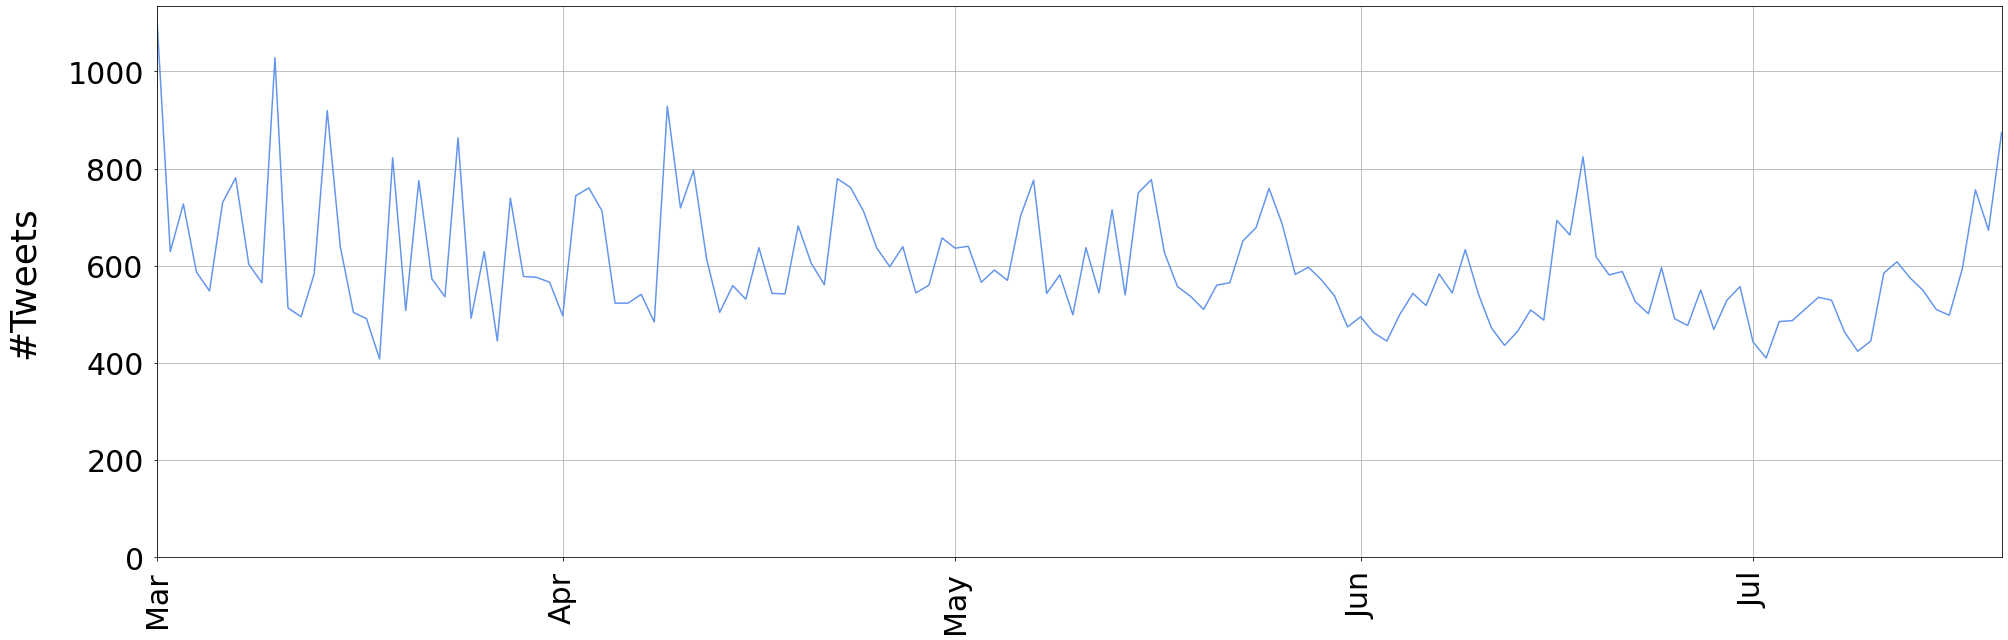

In [37]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year 
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(data['date_col'], data['count'], color="cornflowerblue")
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.874(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid()
plt.savefig('./monitoring/monitoring_lineplot.png')
plt.show()

## - Frequency of words

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

df = pd.read_csv('./labeled/12-01-rebalanced.csv')

dfa = df['text']
dfb = pd.read_csv("keys.txt", sep=';')

Words = dfb['Words'].values
dico = {}
for word in Words:
    dico[word] = dfa.str.count(word).sum()

print(dico)

#plt.bar(dico.keys(), dico.values(), width, color='g')

words = list(dico.keys())
count = list(dico.values())
    
plt.barh(words,count)
plt.title('Word occurences')
plt.ylabel('Keywords')
plt.xlabel('Count')
plt.show()

# - Comparing learning models

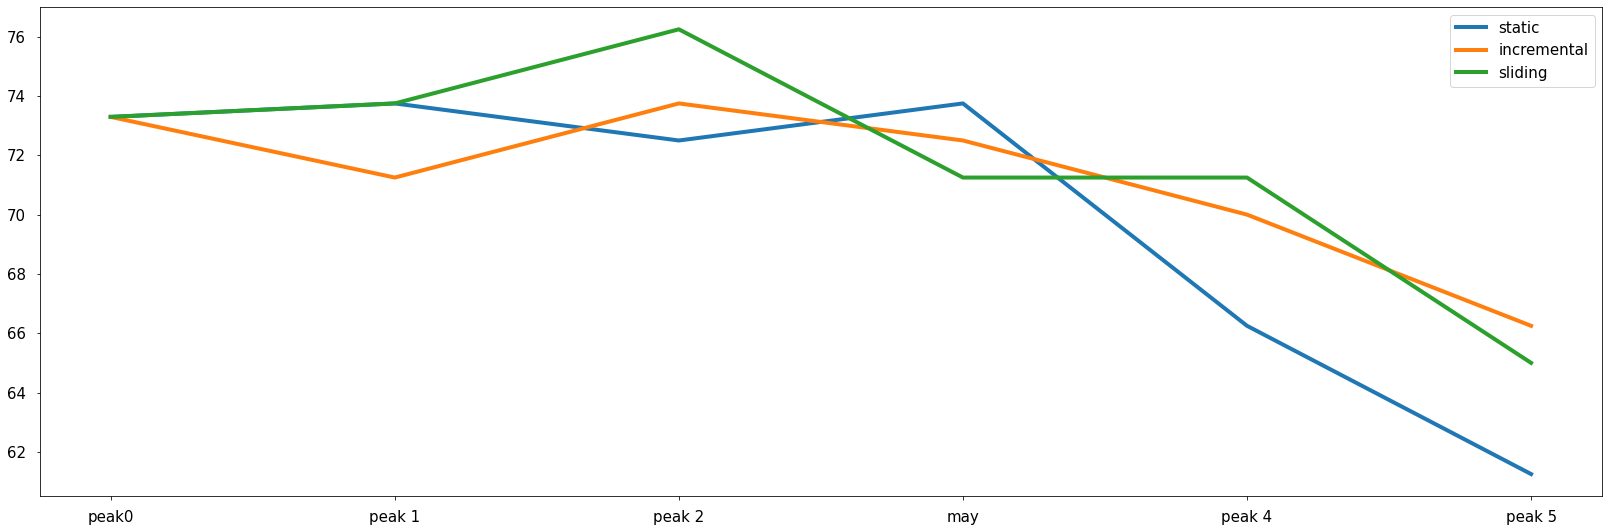

In [3]:
##### import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

path_file = './monitoring/concept_drift/'
start_file ='./models_result/75/test_result_75/ComplementNB-report.csv'
peaks = ["peak" + str(0)]
i = 0
start = pd.read_csv(start_file)
static_values = [start['precision'][2]*100]
incremental_values = [start['precision'][2]*100]
sliding_values = [start['precision'][2]*100]
marker = []
for i in range (0,5):
    static = pd.read_csv(path_file+"static/period"+str(i+1)+"-report-ComplementNB.csv")
    incremental = pd.read_csv(path_file+"incremental/interval"+str(i+1)+"-report-ComplementNB.csv")
    sliding = pd.read_csv(path_file+"sliding/slide"+str(i+1)+"-report-ComplementNB.csv")
    static_values.append(static['precision'][2]*100)
    incremental_values.append(incremental['precision'][2]*100)
    sliding_values.append(sliding['precision'][2]*100)
    marker.append(static['precision'][2]*100)
    if i == 2:
        peaks.append('may')
    else:
        peaks.append("peak "+str(i+1))
    i+=1
    
plt.plot(peaks, static_values, label="static", linewidth=4)
plt.plot(peaks, incremental_values, label="incremental", linewidth=4)
plt.plot(peaks, sliding_values, label="sliding", linewidth=4)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)
plt.legend(fontsize=15)
plt.rcParams["figure.figsize"] = [14,9]
plt.savefig('./monitoring/img/accuracy_for_model-ComplementNB.png')

[4669, 4669, 4669, 4669, 4669, 4669]
[4669, 4406, 4778, 4759, 4685, 4728]
[4669, 4734, 5101, 5238, 5364, 5536]


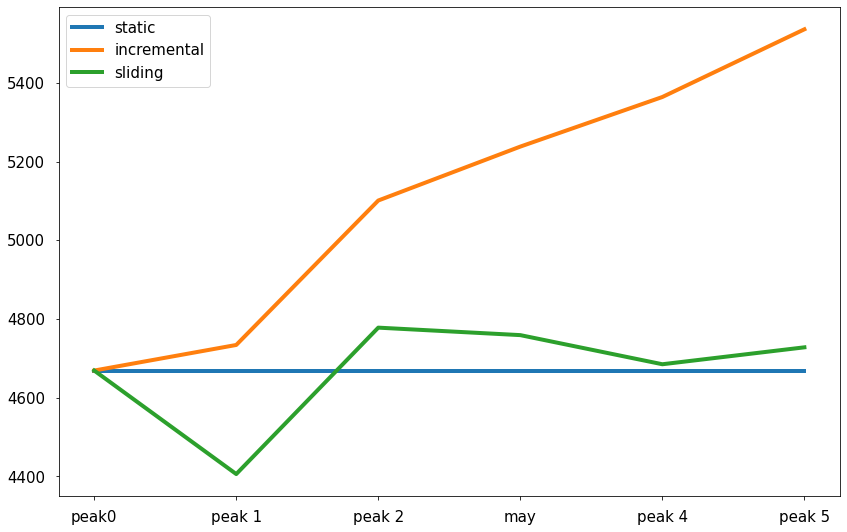

In [4]:
import pickle
static_path = './models_result/75/models_75/'
incremental_path = './monitoring/concept_drift/incremental/'
sliding_path='./monitoring/concept_drift/sliding/'
i=0
static_model = pickle.load(open(static_path+"ComplementNB.sav", 'rb'))
incremental = [4669]
sliding = [4669]
static = [4669]
peaks = ['peak0']

while i in range(0,5):
    incremental_model = pickle.load(open(incremental_path+"ComplementNB_interval" + str(i+1) + ".sav", 'rb'))
    incremental.append(len(incremental_model['vect'].vocabulary_))
    sliding_model = pickle.load(open(sliding_path+"ComplementNB_slide" + str(i+1) + ".sav", 'rb'))
    sliding.append(len(sliding_model['vect'].vocabulary_))
    if i == 2:
        peaks.append('may')
    else:
        peaks.append("peak "+str(i+1))
    static_model = pickle.load(open(static_path+"ComplementNB.sav", 'rb'))
    static.append(len(static_model['vect'].vocabulary_))
    i+=1

print(static)
print(sliding)
print(incremental)
plt.plot(peaks, static, label="static", linewidth=4)
plt.plot(peaks, incremental, label="incremental", linewidth=4)
plt.plot(peaks, sliding, label="sliding", linewidth=4)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)
plt.legend(fontsize=15)
plt.rcParams["figure.figsize"] = [14,9]
plt.savefig('./monitoring/img/features_for_model_ComplementNB.png')

df:  (144638, 5)
data:  (232, 2)
d1:  (232, 3)
d2:  (232, 3)
d3:  (232, 3)


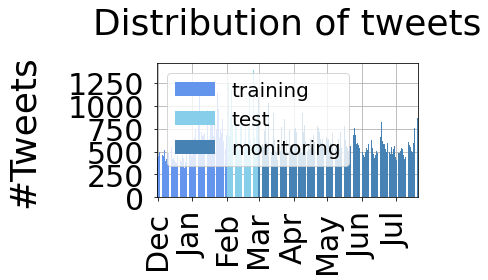

In [2]:
import datetime as dt
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


# build dataframe
tr1 = pd.read_csv('cleaned/2021-12-cleaned.csv')
tr2 = pd.read_csv('cleaned/2022-01-cleaned.csv')
training = pd.concat([tr1, tr2])
test = pd.read_csv('cleaned/2022-02-cleaned.csv')
tt = pd.concat([training, test])
mon1 = pd.read_csv('cleaned/2022-03-cleaned.csv')
mon2 = pd.read_csv('cleaned/2022-04-cleaned.csv')
mon3 = pd.read_csv('cleaned/2022-05-cleaned.csv')
mon4 = pd.read_csv('cleaned/2022-06-cleaned.csv')
mon5 = pd.read_csv('cleaned/2022-07-cleaned.csv')
mon = pd.concat([mon1, mon2, mon3, mon4, mon5])
df = pd.concat([tt, mon])



# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print("df: ", df.shape)

# group by based on month and year
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data.set_index("date_col")
print("data: ", data.shape)



# get only month and year from datetime column (date of exam)
training['date_col'] = training['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
# print("training: ", training.shape)

# group by based on month and year
data1 = training.groupby(['date_col']).size().reset_index(name = 'count')  
data1['date_col'] = data1['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data1['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data1.set_index("date_col")

f1 = pd.DataFrame(np.zeros((28+31+30+31+30+20,1)))
d1 = pd.concat([data1, f1])
print("d1: ", d1.shape)



# get only month and year from datetime column (date of exam)
test['date_col'] = test['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
# print("test: ", test.shape)

# group by based on month and year
data2 = test.groupby(['date_col']).size().reset_index(name = 'count')  
data2['date_col'] = data2['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data2['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data2.set_index("date_col")

f2a = pd.DataFrame(np.zeros((31+31,1)))
f2b = pd.DataFrame(np.zeros((31+30+31+30+20,1)))
d2 = pd.concat([f2a, data2, f2b])
print("d2: ", d2.shape)



# get only month and year from datetime column (date of exam)
mon['date_col'] = mon['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
# print("mon: ", mon.shape)

# group by based on month and year
data3 = mon.groupby(['date_col']).size().reset_index(name = 'count')  
data3['date_col'] = data3['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data3['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data3.set_index("date_col")

f3 = pd.DataFrame(np.zeros((31+31+28,1)))
d3 = pd.concat([f3, data3])
print("d3: ", d3.shape)



# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots()

# g1 = np.greater(data['date_col'], datetime(2022, 1, 31)).astype(int)
# g2 = np.greater(data['date_col'], datetime(2022, 2, 28)).astype(int)
# greater = g1 + g2
colors = np.array(['cornflowerblue', 'skyblue', 'steelblue'])

barlist = plt.bar(data['date_col'], d1['count'], color=colors[0], label='training', zorder=2)
barlist = plt.bar(data['date_col'], d2['count'], color=colors[1], label='test', zorder=2)
barlist = plt.bar(data['date_col'], d3['count'], color=colors[2], label='monitoring', zorder=2)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
labels = plt.ylabel('#Tweets',fontsize=36,labelpad=26)
# labels.set_color("white")
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
# plt.subplots_adjust(bottom=0.55)


plt.legend(fontsize=20)

plt.savefig('./docs/img/overall_barplot.png', bbox_inches='tight')
plt.show()
